# Import Libraries

In [101]:

# Standard Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import os
import json
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data Loading and Initial Exploration

In [46]:
os.chdir("C:/Users/USER/Desktop/GitHub/Nigeria-Housing-Price-Prediction")

In [47]:
# Load datasets
DATA_PATH_NIGERIA = os.getenv("DATA_PATH", default="dataset/nigeria_houses_data.csv")
nigeria_df = pd.read_csv(DATA_PATH_NIGERIA)

In [48]:
nigeria_df.info()
display(nigeria_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [49]:
nigeria_df.shape

(24326, 8)

The dataset consists of 24,326 entries (rows) and 8 columns (features). This indicates that we have data for 24,326 properties across 8 features, which include both numeric and categorical attributes.

# Initial Observations and Data Understanding

In [50]:
nigeria_df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


**Bedrooms, Bathrooms, Toilets, and Parking Space**

- The mean values indicate that most properties are moderately sized, with an average of 4-5 bedrooms, 4-5 bathrooms, 5 toilets, and 4 parking spaces.
- The maximum values (e.g., 9 bedrooms, 9 bathrooms, etc.) indicate that the dataset contains some large, luxury properties.

**Price**

- The mean price is around ₦301 million.
- The standard deviation is very high (₦12.2 billion), indicating that there is significant variation in property prices.
- The min value is ₦90 million, and the max value is a staggering ₦1.8 trillion, suggesting that there are both very affordable and extremely expensive properties.

In [51]:
nigeria_df.describe(include=['object'])

,title,town,state
count,24326,24326,24326
unique,7,189,25
top,Detached Duplex,Lekki,Lagos
freq,13992,10895,18445


**Title**

- There are 7 unique property types in the dataset, with 'Detached Duplex' being the most frequent (13,992 occurrences). This indicates that detached houses are the most common property type.

**Town**

- The dataset contains properties from 189 different towns. The most frequent town is Lekki with 10,895 occurrences, suggesting that Lekki is a popular area for real estate listings in Nigeria.

**State**

- There are 25 unique states, with Lagos being the most frequent (18,445 properties), indicating a strong real estate presence in Lagos.

In [52]:
print("Column Names:", nigeria_df.columns.tolist())

Column Names: ['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town', 'state', 'price']


#  Data Cleaning
- Addressing Datatypes
- Missing Values Analysis
- Duplicate Records
- Outliers Detection

## Addressing Datatypes

In [53]:
nigeria_df.dtypes


bedrooms         float64
bathrooms        float64
toilets          float64
parking_space    float64
title             object
town              object
state             object
price            float64
dtype: object

In [54]:
nigeria_df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


We can see that `bedrooms`, `bathrooms`, `toilets` and `parking_space` are all float datatypes instead of interger. We will need to address that.

In [55]:
# Convert specified columns from float to int
columns_to_convert = ['bedrooms', 'bathrooms', 'toilets', 'parking_space']
nigeria_df[columns_to_convert] = nigeria_df[columns_to_convert].astype('int64')

# Verify the conversion
print(nigeria_df[columns_to_convert].dtypes)



bedrooms         int64
bathrooms        int64
toilets          int64
parking_space    int64
dtype: object


## Missing Values Analysis

In [56]:
nigeria_df.isnull().sum()


bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

we can see that there are no missing values

## Duplicate Records

In [57]:
nigeria_df.duplicated().sum()


10438

In [58]:
# Keep the first occurrence
nigeria_df = nigeria_df.drop_duplicates()

In [59]:
nigeria_df.shape

(13888, 8)

## Outlier Detection

In [60]:
nigeria_df.select_dtypes('number').skew()

bedrooms           0.303463
bathrooms          0.004096
toilets           -0.316401
parking_space      0.499450
price            102.064848
dtype: float64

The skewness values we’ve calculated for the numerical features show the following:

- bedrooms: 0.303 — Mild positive skew.
- bathrooms: 0.004 — Almost symmetric (negligible skew).
- toilets: -0.316 — Mild negative skew.
- parking_space: 0.499 — Moderate positive skew.
- price: 102.065 — Strong positive skew.

<Axes: xlabel='price'>

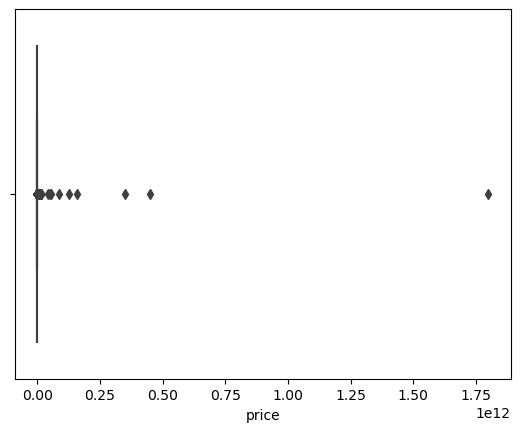

In [61]:
import seaborn as sns
sns.boxplot(x=nigeria_df['price'])


<Axes: >

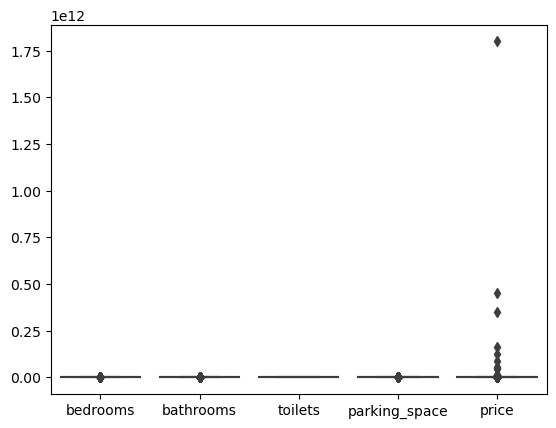

In [62]:
import seaborn as sns
sns.boxplot(data=nigeria_df[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'price']])


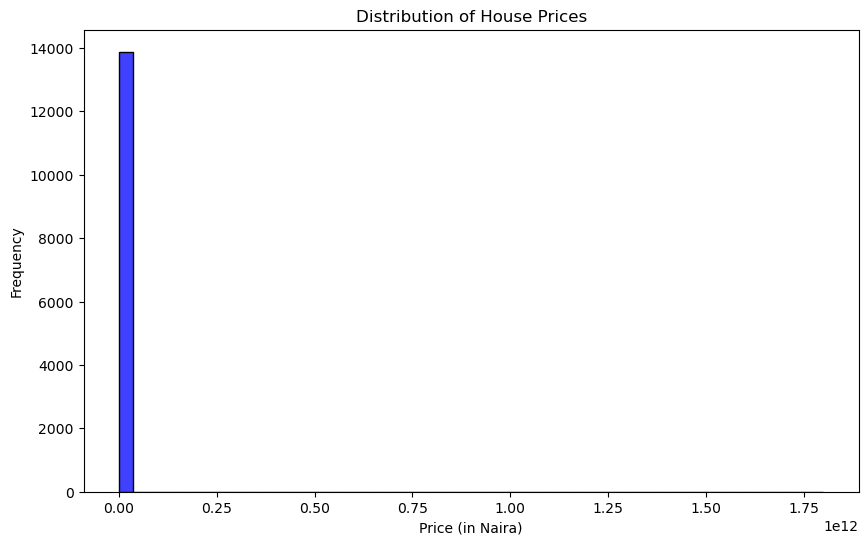

In [63]:
# Plotting the histogram for the 'price' column
plt.figure(figsize=(10, 6))
sns.histplot(nigeria_df['price'], kde=False, color='blue', bins=50)
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Naira)')
plt.ylabel('Frequency')
plt.show()


From the above Outlier detection and also confirming with Visualization method we can wee that only `price` feature is heavily right skewed. we will need to address this. 

In [64]:
# Apply log transformation to the 'price' feature
nigeria_df['price'] = np.log1p(nigeria_df['price'])
nigeria_df.select_dtypes('number').skew()

bedrooms         0.303463
bathrooms        0.004096
toilets         -0.316401
parking_space    0.499450
price            0.373771
dtype: float64

# Exploratory Data Analysis (EDA)

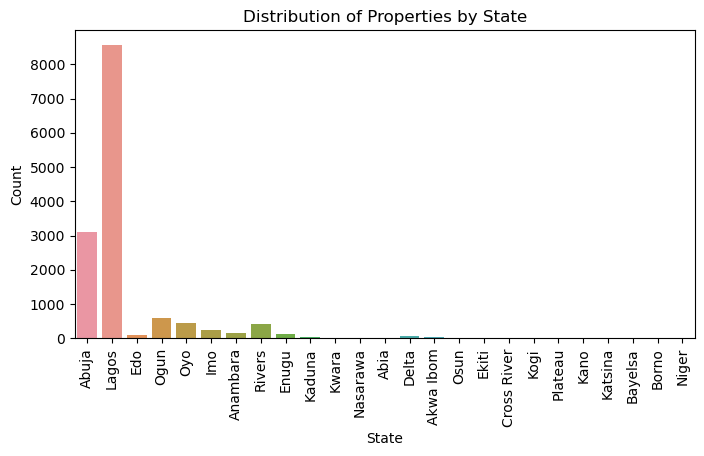

In [65]:
plt.figure(figsize=(8, 4))
sns.countplot(x='state', data=nigeria_df)
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.title('Distribution of Properties by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

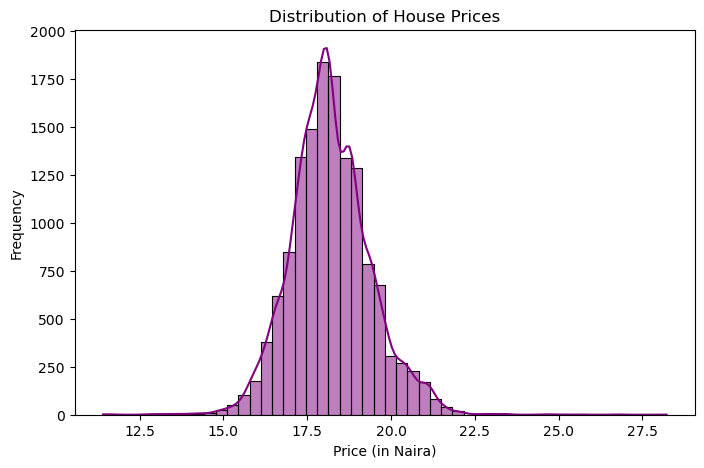

In [66]:
# Plot histogram with KDE for price
plt.figure(figsize=(8, 5))
sns.histplot(nigeria_df['price'], kde=True, bins=50, color='purple')
plt.title('Distribution of House Prices')
plt.xlabel('Price (in Naira)')
plt.ylabel('Frequency')
plt.show()

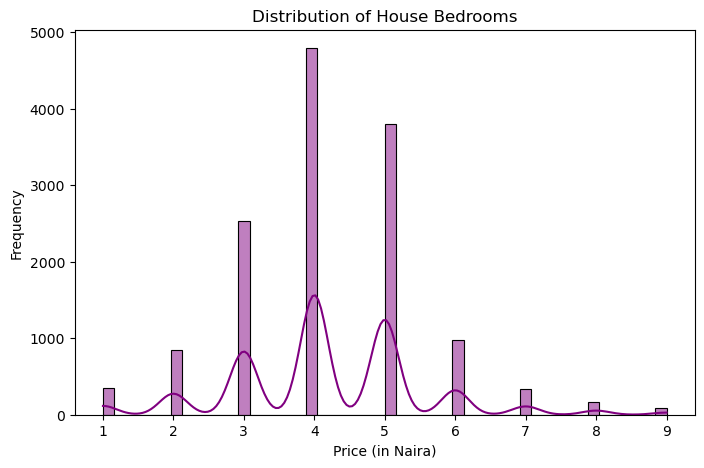

In [67]:
# Plot histogram with KDE for price
plt.figure(figsize=(8, 5))
sns.histplot(nigeria_df['bedrooms'], kde=True, bins=50, color='purple')
plt.title('Distribution of House Bedrooms')
plt.xlabel('Price (in Naira)')
plt.ylabel('Frequency')
plt.show();

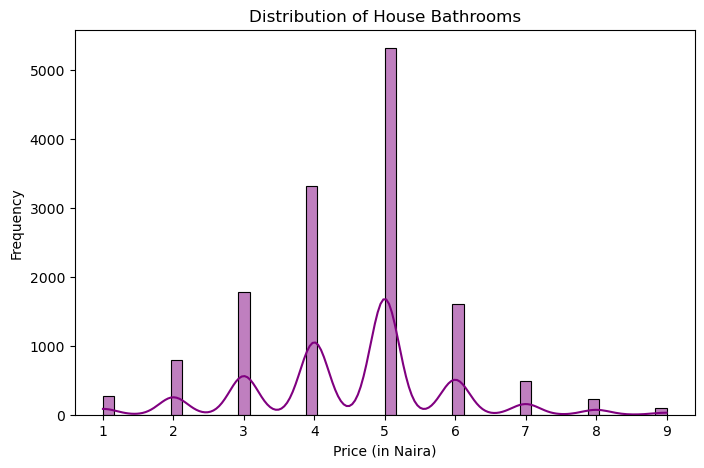

In [68]:
# Plot histogram with KDE for price
plt.figure(figsize=(8, 5))
sns.histplot(nigeria_df['bathrooms'], kde=True, bins=50, color='purple')
plt.title('Distribution of House Bathrooms')
plt.xlabel('Price (in Naira)')
plt.ylabel('Frequency')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_56120\1714130282.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nigeria_df.corr(), annot=True)


<Axes: >

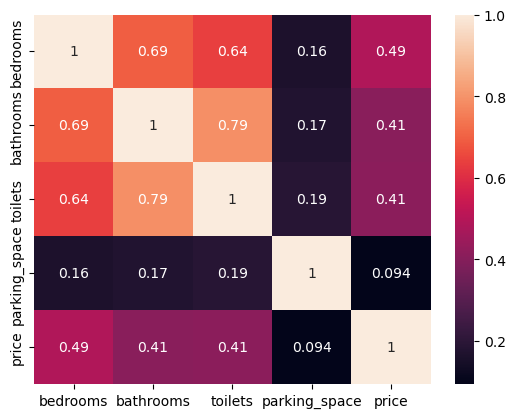

In [69]:
sns.heatmap(nigeria_df.corr(), annot=True)


## Categorical Analysis

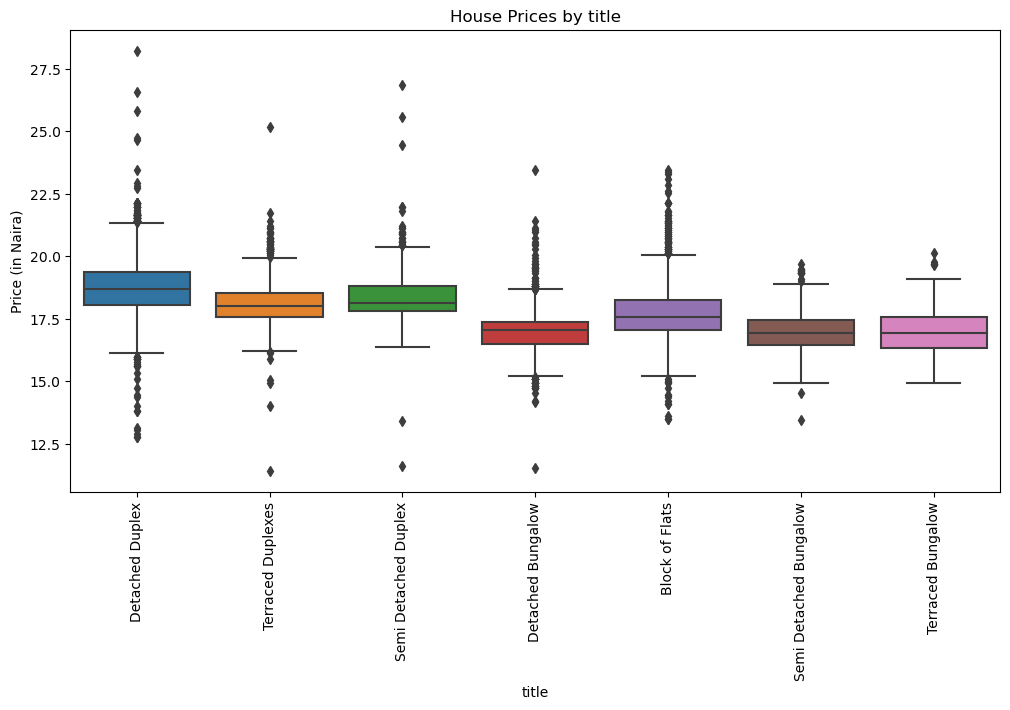

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='title', y='price', data=nigeria_df)
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.title('House Prices by title')
plt.xlabel('title')
plt.ylabel('Price (in Naira)')
plt.show();

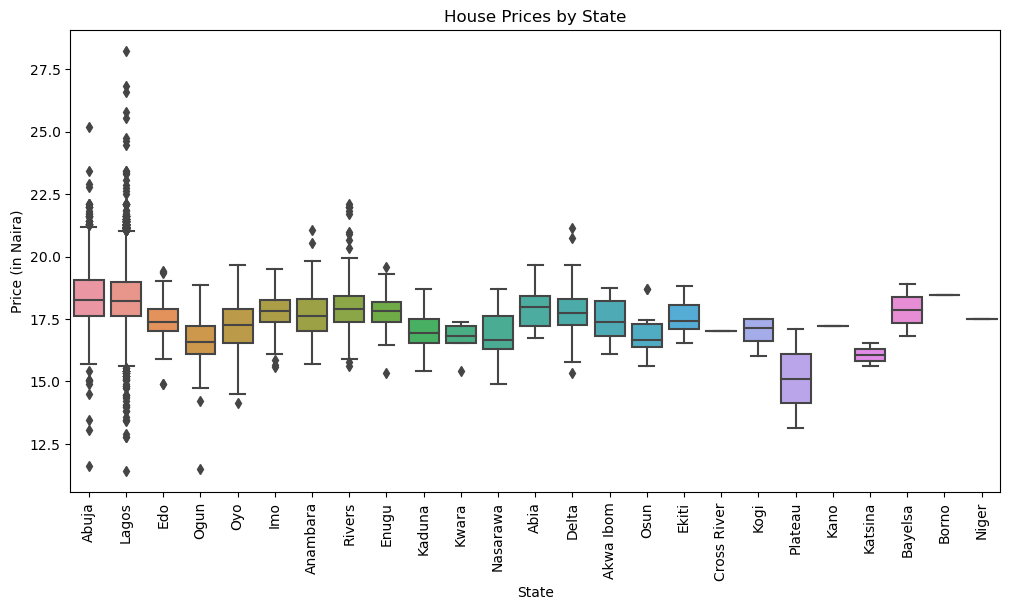

In [71]:
# Apply log transformation if needed
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='price', data=nigeria_df)
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.title('House Prices by State')
plt.xlabel('State')
plt.ylabel('Price (in Naira)')
plt.show()


# Data Preprocessing and Feature Engineering

In [72]:
nigeria_df['title'].unique()

array(['Detached Duplex', 'Terraced Duplexes', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [73]:
nigeria_df['property_type'] = nigeria_df['title'].map({
    'Detached Duplex': 1,
    'Terraced Duplexes': 2,
    'Semi Detached Duplex': 3,
    'Detached Bungalow': 4,
    'Block of Flats': 5,
    'Semi Detached Bungalow': 6,
    'Terraced Bungalow': 7
})
nigeria_df.drop('title',axis = 1, inplace = True)

In [74]:
# Price per bedroom
nigeria_df['price_per_bedroom'] = nigeria_df['price'] / nigeria_df['bedrooms']

In [75]:
nigeria_df.head()

,bedrooms,bathrooms,toilets,parking_space,town,state,price,property_type,price_per_bedroom
0,6,5,5,4,Mabushi,Abuja,19.924758,1,3.320793
1,4,5,5,4,Katampe,Abuja,20.500122,2,5.125031
2,4,5,5,4,Lekki,Lagos,18.603002,1,4.650751
3,4,4,5,6,Ajah,Lagos,17.504390,1,4.376098
4,4,4,5,2,Lekki,Lagos,18.132999,3,4.533250


In [76]:
nigeria_df['state'].unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [77]:
# Initialize the label encoder
le_state = LabelEncoder()

# Apply label encoding to the 'state' column
nigeria_df['state_encoded'] = le_state.fit_transform(nigeria_df['state'])
nigeria_df.drop('state', axis = 1, inplace = True)
nigeria_df.head()

,bedrooms,bathrooms,toilets,parking_space,town,price,property_type,price_per_bedroom,state_encoded
0,6,5,5,4,Mabushi,19.924758,1,3.320793,1
1,4,5,5,4,Katampe,20.500122,2,5.125031,1
2,4,5,5,4,Lekki,18.603002,1,4.650751,17
3,4,4,5,6,Ajah,17.504390,1,4.376098,17
4,4,4,5,2,Lekki,18.132999,3,4.533250,17


In [78]:
nigeria_df['town'].unique()

array(['Mabushi', 'Katampe', 'Lekki', 'Ajah', 'Epe', 'Lokogoma District',
       'Oredo', 'Victoria Island (VI)', 'Mowe Ofada', 'Ikeja', 'Ikoyi',
       'Magodo', 'Kaura', 'Galadimawa', 'Gwarinpa', 'Abeokuta North',
       'Lugbe District', 'Ibeju Lekki', 'Yaba', 'Sango Ota',
       'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Jahi', 'Ibadan', 'Orozo',
       'Ifo', 'Owerri North', 'Guzape District', 'Idu Industrial',
       'Owerri Municipal', 'Isheri North', 'Utako', 'Port Harcourt',
       'Kuje', 'Isheri', 'Life Camp', 'Ipaja', 'Ado-Odo/Ota', 'Dape',
       'Mushin', 'Ejigbo', 'Isolo', 'Ojodu', 'Gaduwa', 'Enugu', 'Dakwo',
       'Asokoro District', 'Alimosho', 'Sagamu', 'Chikun', 'Egbeda',
       'Wuye', 'Kubwa', 'Shomolu', 'Ogudu', 'Owerri West', 'Ibafo',
       'Surulere', 'Obio-Akpor', 'Ayobo', 'Apo', 'Mowe Town',
       'Ibadan South-West', 'Wuse 2', 'Durumi', 'Simawa', 'Arepo',
       'Ikotun', 'Oluyole', 'Maitama District', 'Maryland', 'Ido',
       'Karsana', 'Wuse', 'Ilorin West', 

In [79]:
# One-Hot Encoding for 'town' column
df_processed = pd.get_dummies(nigeria_df, columns=['town'], drop_first=True)
df_processed.head()

,bedrooms,bathrooms,toilets,parking_space,price,property_type,price_per_bedroom,state_encoded,town_Abeokuta North,town_Abeokuta South,...,town_Uyo,town_Victoria Island (VI),town_Warri,town_Wumba,town_Wuse,town_Wuse 2,town_Wuye,town_Yaba,town_Yenagoa,town_Yewa South
0,6,5,5,4,19.924758,1,3.320793,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,5,5,4,20.500122,2,5.125031,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,5,5,4,18.603002,1,4.650751,17,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,5,6,17.504390,1,4.376098,17,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,5,2,18.132999,3,4.533250,17,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Save the DataFrame to a CSV file
df_processed.to_csv('dataset/df_processed.csv', index=False)


# Data Splitting

In [81]:
# Define target and features
y = df_processed['price']
X = df_processed.drop('price', axis=1)

# Split the data into 80% training and 20% testing, without stratification (as price is continuous)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data Scaling

In [82]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (no fitting on test data)
X_test_scaled = scaler.transform(X_test)

# Model Development and Training

## Traditional Models
- Linear Regression

In [83]:
# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Record performance metrics
print(f"Linear Regression - MAE: {mae_linear}, MSE: {mse_linear}, RMSE: {rmse_linear}, R-squared: {r2_linear}")


Linear Regression - MAE: 536604949.90823054, MSE: 3.037330414338782e+20, RMSE: 17427938530.815346, R-squared: -2.0935737910676734e+20


## Polynomial (Quadratic) Regression

In [84]:
from sklearn.decomposition import PCA

# Generate polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=100)  # Adjust n_components as needed
X_train_poly_reduced = pca.fit_transform(X_train_poly)
X_test_poly_reduced = pca.transform(X_test_poly)

# Train the model on the reduced features
poly_model = LinearRegression()
poly_model.fit(X_train_poly_reduced, y_train)

# Predictions and evaluation
y_pred_poly = poly_model.predict(X_test_poly_reduced)

# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Record performance metrics
print(f"Polynomial Regression - MAE: {mae_poly}, MSE: {mse_poly}, RMSE: {rmse_poly}, R-squared: {r2_poly}")


Polynomial Regression - MAE: 0.9143442257406619, MSE: 1.4189136863795626, RMSE: 1.1911816345039754, R-squared: 0.02196992083320648


## Logarithmic Regression

In [98]:
# Adding a small constant to avoid log of zero
y_train_log = np.log(y_train + 1)
y_test_log = np.log(y_test + 1)

# Initialize and train Linear Regression model on the log-transformed target
log_model = LinearRegression()
log_model.fit(X_train, y_train_log)

# Predictions on the test set
y_pred_log = np.exp(log_model.predict(X_test_scaled)) - 1  # Inverse log transformation with adjustment

# Evaluate the model
mae_log = mean_absolute_error(y_test, y_pred_log)
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_log = r2_score(y_test, y_pred_log)

# Record performance metrics
print(f"Logarithmic Regression - MAE: {mae_log}, MSE: {mse_log}, RMSE: {rmse_log}, R-squared: {r2_log}")


Logarithmic Regression - MAE: 9.728299680166948, MSE: 75535.60354947322, RMSE: 274.837412936218, R-squared: -52064.24754011062


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Machine Learning Models
- Random Forest Regressor

In [86]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Record performance metrics
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R-squared: {r2_rf}")


Random Forest - MAE: 0.04780933643812651, MSE: 0.06017300815713244, RMSE: 0.24530187149129629, R-squared: 0.9585238957827055


## Gradient Boosting Regressor

In [87]:
# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Record performance metrics
print(f"Gradient Boosting - MAE: {mae_gb}, MSE: {mse_gb}, RMSE: {rmse_gb}, R-squared: {r2_gb}")


Gradient Boosting - MAE: 0.22918897935466373, MSE: 0.13238888675411256, RMSE: 0.36385283667179585, R-squared: 0.908746871190379


# Model Performance Comparison

## Linear Regression
- **MAE**: \( 5.37 \times 10^8 \)
- **MSE**: \( 3.04 \times 10^{20} \)
- **RMSE**: \( 1.74 \times 10^{10} \)
- **R-squared**: \( -2.09 \times 10^{20} \) (very low, negative value indicates poor fit)

## Polynomial Regression
- **MAE**: 0.91
- **MSE**: 1.42
- **RMSE**: 1.19
- **R-squared**: 0.022 (small positive value)

## Logarithmic Regression
- **MAE**: 9.73
- **MSE**: 75535.60
- **RMSE**: 274.84
- **R-squared**: -52064.25 (extremely low, negative value indicating poor fit)

## Random Forest Regressor
- **MAE**: 0.048
- **MSE**: 0.060
- **RMSE**: 0.245
- **R-squared**: 0.959 (high, indicating a strong fit)

## Gradient Boosting Regressor
- **MAE**: 0.23
- **MSE**: 0.13
- **RMSE**: 0.364
- **R-squared**: 0.909 (high, indicating a good fit but slightly less than Random Forest)

---

# Analysis and Next Steps

The **Random Forest Regressor** achieved the best performance, with the highest \( R^2 \) value of approximately 0.959 and the lowest error values (MAE, MSE, RMSE). This suggests it is the best-performing model for predicting housing prices in this case.


# Hyperparameter Tuning (Random Forest)

In [102]:
# Set up parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
}

# Initialize RandomizedSearchCV for Random Forest
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid, n_iter=5, cv=3, random_state=42)
rf_search.fit(X_train_scaled, y_train)

# Best parameters and model evaluation
print("Best parameters for Random Forest: ", rf_search.best_params_)
y_pred_rf_search = rf_search.best_estimator_.predict(X_test_scaled)

# Evaluate the tuned model
mae_rf_search = mean_absolute_error(y_test, y_pred_rf_search)
mse_rf_search = mean_squared_error(y_test, y_pred_rf_search)
rmse_rf_search = np.sqrt(mse_rf_search)
r2_rf_search = r2_score(y_test, y_pred_rf_search)

# Record performance metrics
print(f"Tuned Random Forest - MAE: {mae_rf_search}, MSE: {mse_rf_search}, RMSE: {rmse_rf_search}, R-squared: {r2_rf_search}")


Best parameters for Random Forest:  {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}
Tuned Random Forest - MAE: 0.05203839438697594, MSE: 0.06525771145762378, RMSE: 0.25545588945574105, R-squared: 0.9550191070000924


In [104]:
results = pd.DataFrame({
    'Model': ['Random Forest (Tuned)'],
    'MAE': [mae_rf_search],
    'MSE': [mse_rf_search],
    'RMSE': [rmse_rf_search],
    'R-Squared': [r2_rf_search]
})
print(results)


                   Model       MAE       MSE      RMSE  R-Squared
0  Random Forest (Tuned)  0.052038  0.065258  0.255456   0.955019


# Saving the best Model

In [105]:
best_rf_model = rf_search.best_estimator_
joblib.dump(best_rf_model, './model/best_rf_model.pkl')


['./model/best_rf_model.pkl']

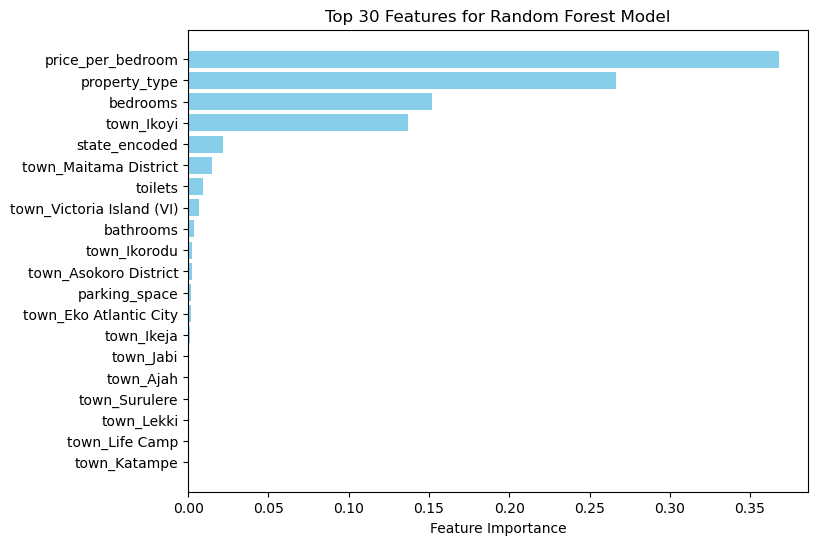

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_rf_model' is the best Random Forest model obtained from GridSearchCV or RandomizedSearchCV
# and 'X_train' is your training DataFrame with feature names.

# Get feature importances from the model
feature_importances = best_rf_model.feature_importances_
features = X_train.columns  # Ensure X_train is a DataFrame so columns are available

# Create a DataFrame to hold features and their importance scores
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort by importance in descending order and select the top 30 features
top_30_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 30 features
plt.figure(figsize=(8, 6))
plt.barh(top_30_features['Feature'], top_30_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 30 Features for Random Forest Model')
plt.gca().invert_yaxis()  # Keep the highest importance feature at the top
plt.show()


# Model Interpretation and Feature Importance

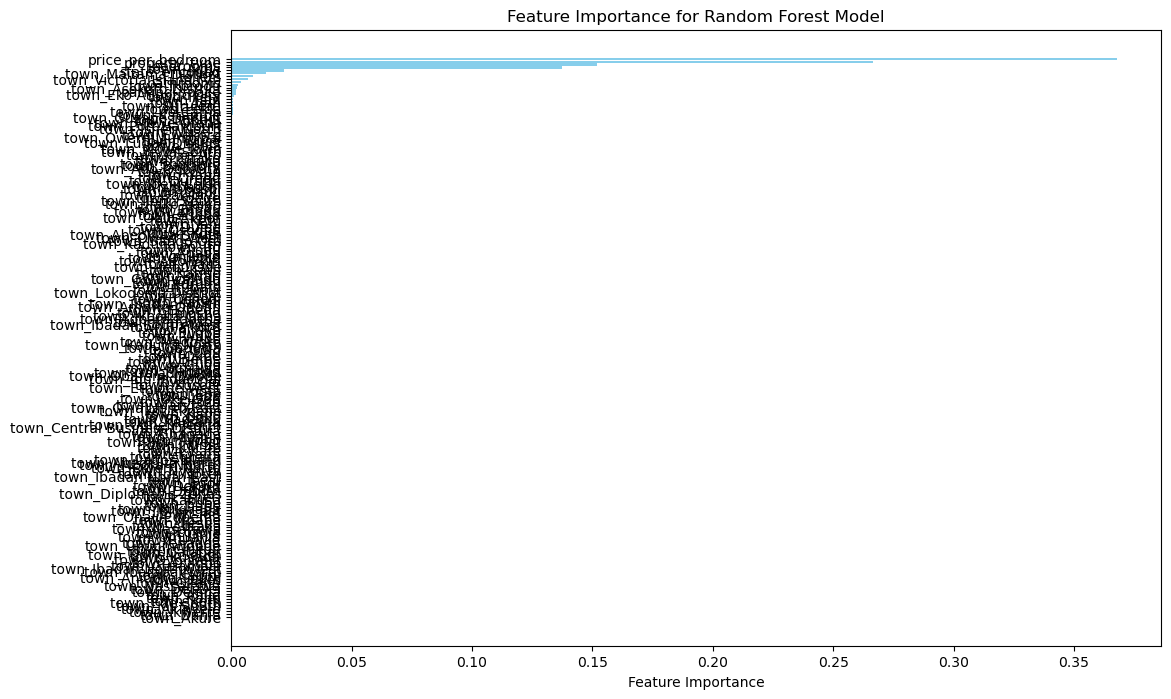

In [110]:
feature_importances = best_rf_model.feature_importances_
features = X_train.columns  # Assumes X_train is a DataFrame
# importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)




# Sort by importance and select all features
importance_df = importance_df.sort_values(by='Importance', ascending=True)  # Sort for a horizontal bar plot

plt.figure(figsize=(12, 8))  # Increase the figure size
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Random Forest Model')
plt.yticks(fontsize=10)  # Reduce font size for y-ticks if needed
plt.show()



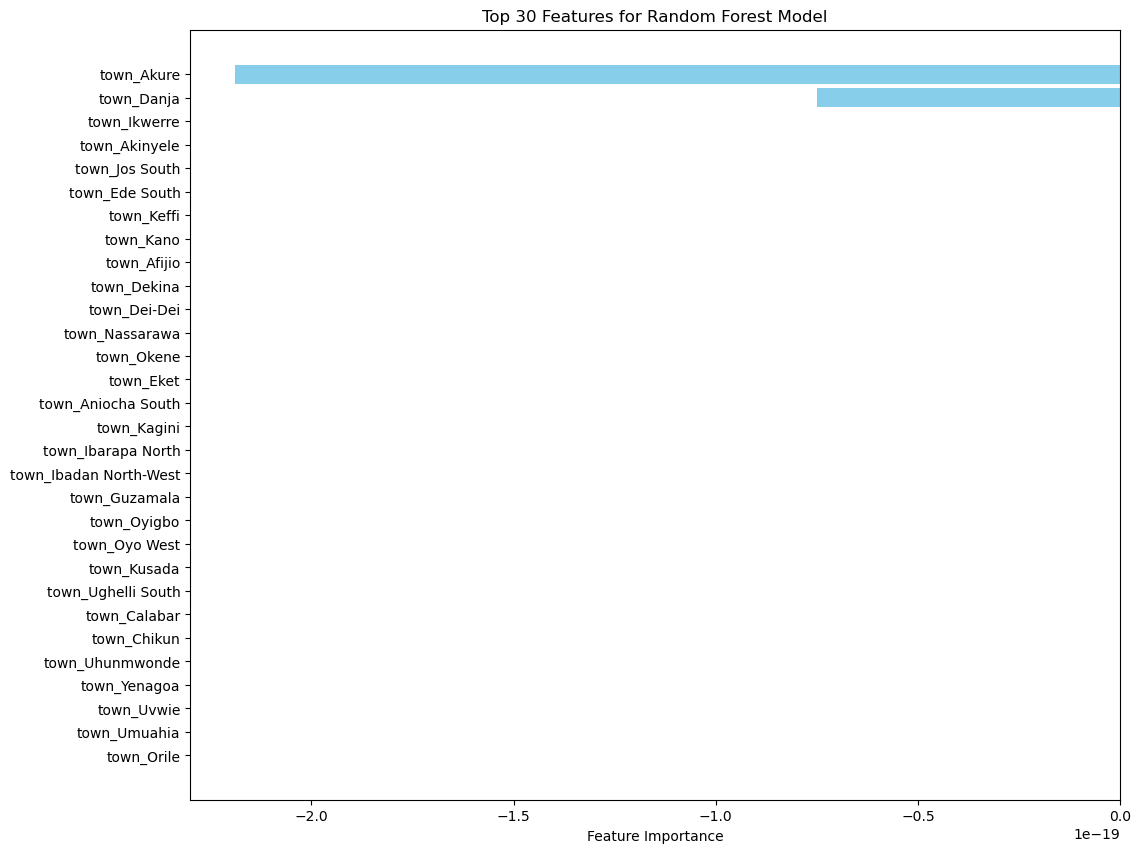

In [111]:
# Sort the importance values and select the top 30 features
top_30_features = importance_df.head(30)

plt.figure(figsize=(12, 10))  # Increase figure size to accommodate more features
plt.barh(top_30_features['Feature'], top_30_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 30 Features for Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis so the most important feature is at the top
plt.show()


# 